# Validating Model

1. Examining resized images
    1. Load validation data (images with shots).
    2. Resize images.
    3. Examine coordinates that should contain shots.
        1. Is the high attenuation coefficient preserved? How much has it decreased by?

In [37]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom
from paralleltomo import paralleltomo

def convert_to_ac(grayscale_im):
    """
    Converts a grayscale image (Numpy array) to an array of attenuation coefficients

    """
    grayScaleToAttCoeff = lambda x: (x/255)*30.32
    cFunc = np.vectorize(grayScaleToAttCoeff)
    return cFunc(grayscale_im)

resize_factor = 200/500

In [38]:
# Beginning with plank 1

# slice 1 (slice0.png)
# 1 lead shot
shot_coords = (63, 463)
# New shot coordinates after resizing
new_shot_coords = (round(shot_coords[0]*resize_factor), round(shot_coords[1]*resize_factor))
print(f"Old shot coordinates: {shot_coords}")
print(f"New shot coordinates: {new_shot_coords}")


Old shot coordinates: (63, 463)
New shot coordinates: (25, 185)


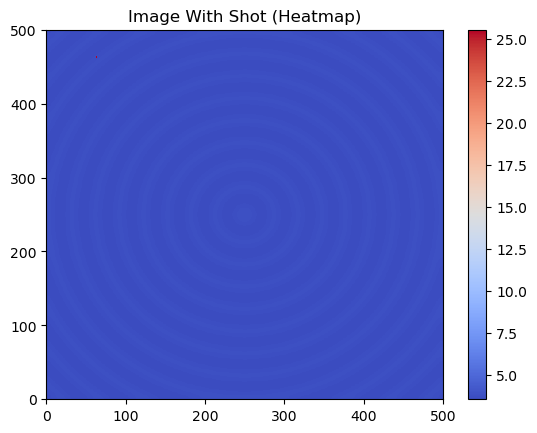

In [39]:
# Loading image, testing if above method is suitable
path_to_slice = "validation data generation/validation-data/plank1/slice0-withshot.png"

img = Image.open(path_to_slice)
# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

# Displaying image (as heatmap)

heatmap = plt.pcolor(im_AC, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [40]:
# Resizing image

resized_im = zoom(im_AC, (resize_factor,resize_factor), order=1, mode = "grid-constant")

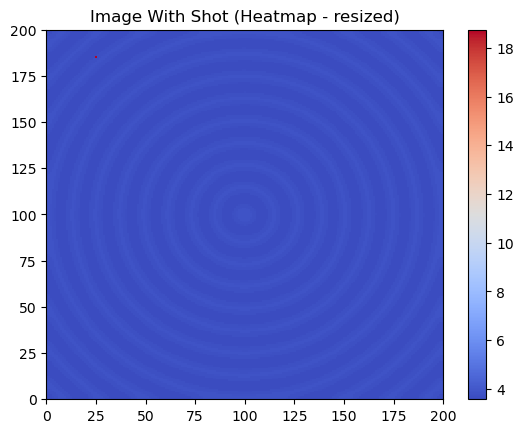

In [41]:
# Analysing resized image

heatmapresized = plt.pcolor(resized_im, cmap="coolwarm")
plt.colorbar(heatmapresized)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

In [42]:
np.max(resized_im)

18.74767248004726

In [62]:
# Parameters to use
N = 200
theta = np.matrix(np.linspace(0, 180, 90)) 
p = 500
A = paralleltomo(N, theta, p)[0]

c:\ProgramData\miles\GitHubDesktop\app-2.9.11\Data-Structures-and-Algorithms-I\MathModellingDTU\Exam Project\paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [63]:
# Recreating image


# Forward projection
x = np.ravel(resized_im)

b = np.matmul(A, x)

In [64]:
Q, R = np.linalg.qr(A)

In [46]:
def qr_sol(Q,R,b):
    y = np.dot(Q.T,b)
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i,j] * x[j]
        x[i] /= R[i,i]
    
    return x

In [48]:
x = qr_sol(Q,R,b)

C:\Users\miles\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [55]:
R.shape

(15750, 40000)

In [53]:
b.shape

(15750,)

In [61]:
theta.shape[1]*500 > N**2

True